In [1]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
from itertools import chain
import random

In [3]:
# Read the data directly from the raw ASJP source
filename = "/content/languages.csv"
gled = pd.read_csv(filename)
gled = gled[["Glottocode", "Latitude", "Longitude", "Family"]]
gled = gled[gled['Latitude'].notna()]
gled = gled[gled['Longitude'].notna()]
gled = gled[gled['Family'].notna()]
gled = gled.drop_duplicates()

# We shuffle the list so as not get confusing similar colors as when the names
# are alphabetically sorted; seed found by trial and error
random.seed(8)
families = sorted(set(gled['Family'].values))
random.shuffle(families)
gled["Fidx"] = gled.apply(lambda row:families.index(row.Family), axis=1)


In [4]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)

    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle="-", alpha=0.3, color="w")

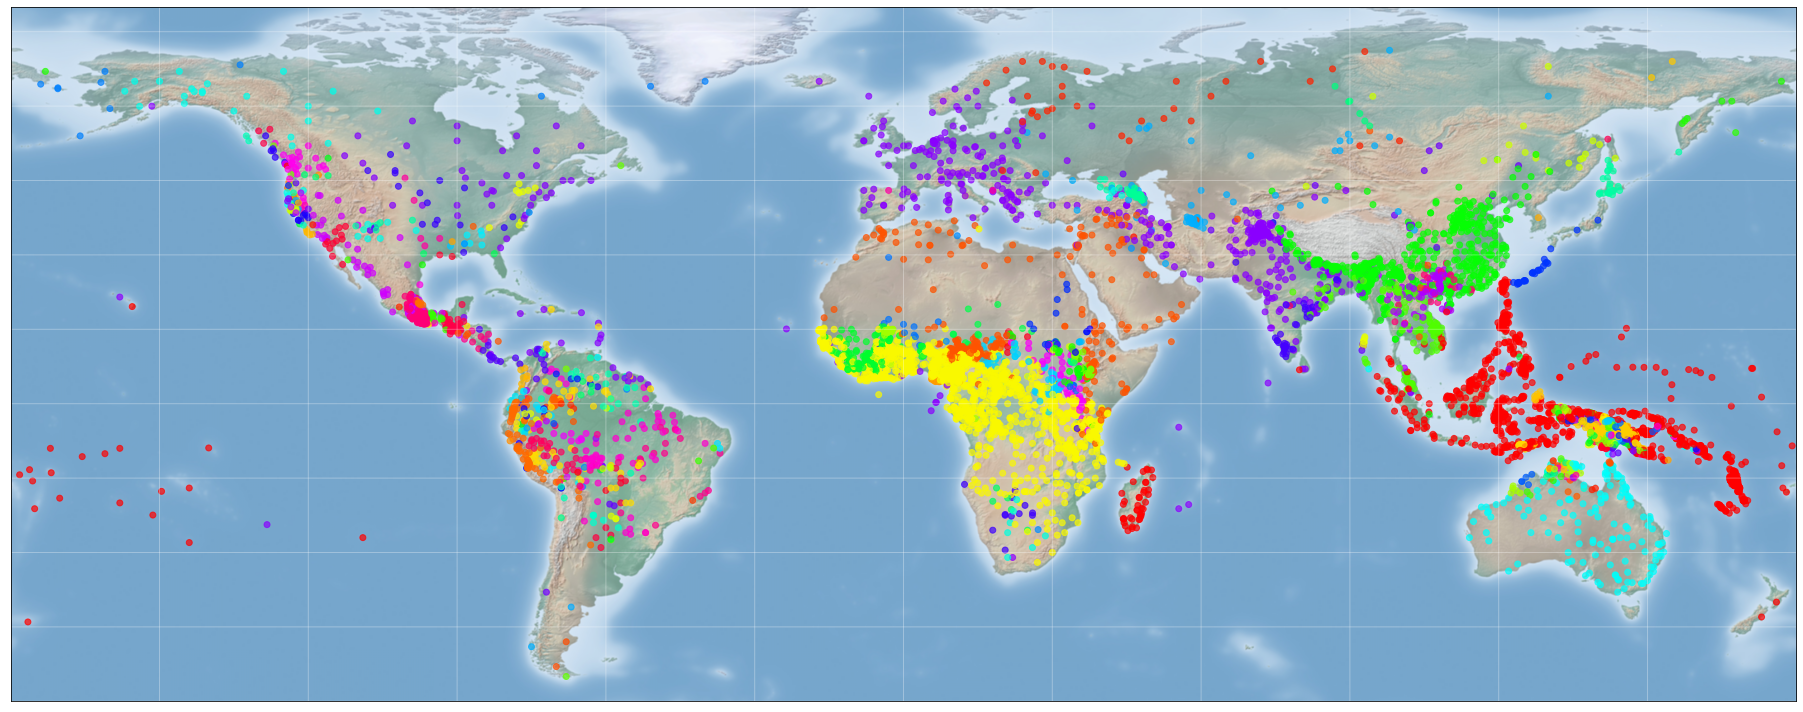

In [5]:
SCALE = 4
fig = plt.figure(figsize=(8*SCALE, 6*SCALE), edgecolor="w")
map = Basemap(
  projection="cyl",
  resolution=None,
  llcrnrlat=-60,
  urcrnrlat=80,
  llcrnrlon=-180,
  urcrnrlon=180,
  lon_0=0, lat_0=0,
)

lat = gled['Latitude'].values
lon = gled['Longitude'].values
family = gled['Fidx'].values

map.scatter(lon, lat, latlon=True,
          c=family,
          #s=area,
          cmap='hsv',
          alpha=0.7,
          )

draw_map(map)